In [1]:
from lib.preamble import *
%matplotlib widget

Only looked at exfoliated NiPS3 samples.

# Luminscence

## 532 nm

Exposure 10s, 5 times average and at 10 K
The copper was roughly *polished* using sandpaper.
Therefore the from the copper reflected light was scattered. The light from the sample was reflected cleanly. Therefore an iris was used to block some of the background. 

In [2]:
paths = glob("d001*.asc")
paths += glob("d002*.asc")
df = pd.DataFrame(map(import_spectrum, paths)).sort_index()
df

,wavelength,intensity,number,material,method,capture,temperature,name,remaining,path
0,"[560.0, 560.086, 560.17194, 560.25787, 560.343...","[1824.0, 1824.2, 1824.44, 1826.3, 1826.01, 182...",1,None,None,None,None,d001 02 cosmicRayRemoval,"[02, cosmicRayRemoval]",d001_02_cosmicRayRemoval.asc
1,"[560.0, 560.086, 560.17194, 560.25787, 560.343...","[1825.0, 1824.26, 1826.27, 1825.47, 1825.53, 1...",1,None,None,None,None,d001 01,[01],d001_01.asc
2,"[560.0, 560.086, 560.17194, 560.25787, 560.343...","[1818.0, 1819.29, 1819.06, 1822.53, 1823.1, 18...",2,None,None,None,None,d002 offSample,[offSample],d002_offSample.asc


/home/leon/Projekte/Studium/2023_WS/batchelorarbeit/src/lib/utils.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1239.84187/ev


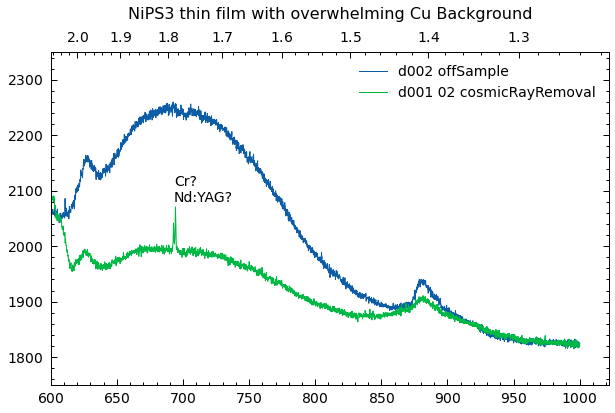

In [3]:
def plot_spectrum(d):
	plt.plot(d.wavelength, d.intensity, label=d["name"])

plt.figure()
plot_spectrum(df.iloc[2])
plot_spectrum(df.iloc[0])
plt.legend()
plot.energy_ticks()
plt.xlim(600, None)
plt.ylim(1750, 2350)
plt.title("NiPS3 thin film with overwhelming Cu Background")
plt.annotate(
	"Cr?\nNd:YAG?",
	(693, 2080)
)
plt.show()

### Power Sensitivity

40 mW laser corresponds to 5.3 mW on sample.   
.1s exposure time, 10 averages.

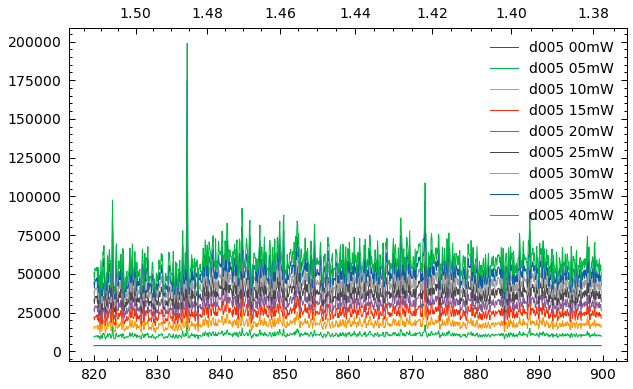

In [4]:
paths = glob("d005*.asc")
df = pd.DataFrame(map(import_spectrum, paths)).sort_values("name")

plt.figure()

for i, d in df.iterrows():
	plt.plot(d.wavelength, d.intensity, label=d["name"])
plt.legend()
plot.energy_ticks()
plt.show()

Forgot to filter out the laser and these lines are probably reflections of the laser in the spectrometer.

## 515 nm

The next day the 515 nm peak was used (like on the bulk material).   
This also didn't excited a peak.

In [13]:
paths = glob("d006*.asc")
df = pd.DataFrame(map(import_spectrum, paths)).sort_index()
df

,wavelength,intensity,number,material,method,capture,temperature,name,remaining,path
0,"[400.0, 400.08881, 400.17758, 400.26636, 400.3...","[3634.0, 3633.9385, 3631.1038, 3632.1243, 3636...",6,None,None,None,None,d006 offSample,[offSample],d006_offSample.asc
1,"[400.0, 400.08881, 400.17758, 400.26636, 400.3...","[3631.0, 3630.0813, 3629.855, 3632.7041, 3636....",6,None,None,None,None,d006 onSample,[onSample],d006_onSample.asc


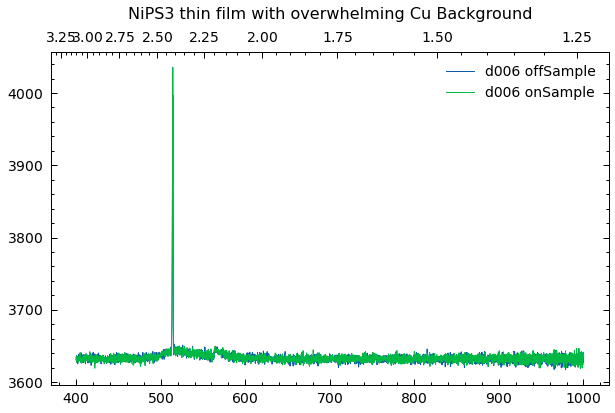

In [20]:
def plot_spectrum(d):
	plt.plot(d.wavelength, d.intensity, label=d["name"])

plt.figure()
plot_spectrum(df.iloc[0])
plot_spectrum(df.iloc[1])
plt.legend()
plot.energy_ticks()
# plt.xlim(800, 900)
plt.title("NiPS3 thin film with overwhelming Cu Background")
plt.show()

# Reflectivity

The reflectivity was too low, therefore the apertures were open up. Therefore the spectral and spatial resolution is lower.

In [5]:
paths = glob("*refl*.asc")
df = pd.DataFrame(map(import_spectrum, paths)).sort_index()
df

,wavelength,intensity,number,material,method,capture,temperature,name,remaining,path
0,"[400.0, 400.08881, 400.17758, 400.26636, 400.3...","[3648.0, 3646.51, 3650.8, 3653.72, 3655.02, 36...",4,None,reflectance,None,None,d004 refl offFlake,[offFlake],d004_refl_offFlake.asc
1,"[400.0, 400.08881, 400.17758, 400.26636, 400.3...","[3650.0, 3658.86, 3658.85, 3654.27, 3652.28, 3...",3,None,reflectance,None,None,d003 refl onFlake,[onFlake],d003_refl_onFlake.asc


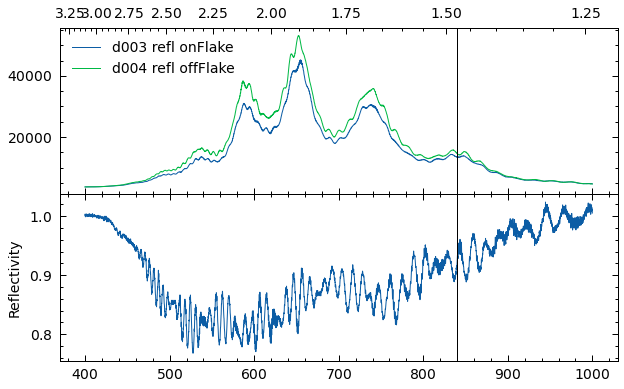

In [9]:
def plot_spectrum(d):
	plt.plot(d.wavelength, d.intensity, label=d["name"])

plt.figure()
ax = plt.subplot(2, 1, 1)
plot_spectrum(df.iloc[1])
plot_spectrum(df.iloc[0])
plt.axvline(840, color="k", lw=0.5)
plot.energy_ticks()
plt.legend()
plt.subplot(2, 1, 2, sharex=ax)
plt.plot(df.iloc[0].wavelength, df.iloc[1].intensity / df.iloc[0].intensity)
plt.axvline(840, color="k", lw=0.5)
plt.ylabel("Reflectivity")
plt.subplots_adjust(hspace=0)
plt.show()

The thickness of something is probably:

In [1]:
1/(2/737+2/656)

173.53625269203158

Maybe CuO-Layer? Maybe just defocused and step and glue artefact?

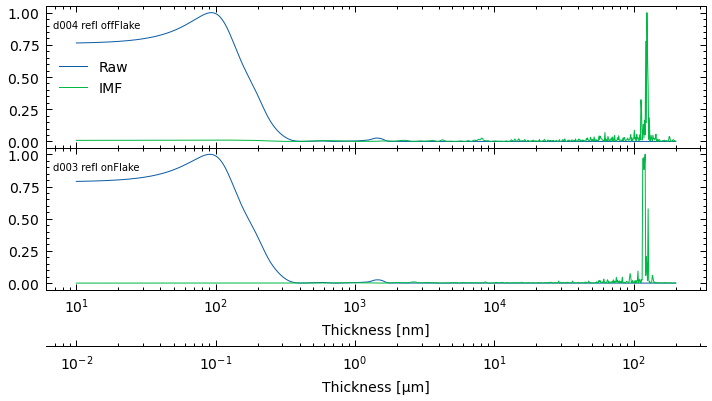

In [12]:
from lib.spectroscopy import calc_thickness

thicknesses = np.geomspace(10, 200e3, 1000)

df["thickness_signal_raw"] = df.apply(
	lambda x: calc_thickness(x.wavelength, x.intensity, thicknesses, imf=False),
	axis=1
)

df["thickness_signal_imf"] = df.apply(
	lambda x: calc_thickness(x.wavelength, x.intensity, thicknesses, imf=True),
	axis=1
)

fig, ax = plot.stack(len(df))
for a, (m, row) in zip(ax, df.iterrows()):
    a.plot(thicknesses, row.thickness_signal_raw/row.thickness_signal_raw.max(), label="Raw")
    a.plot(thicknesses, row.thickness_signal_imf/row.thickness_signal_imf.max(), label="IMF")
    # a.set_ylabel(m)
    a.set_xscale("log")
ax[0].legend()
plt.xlabel("Thickness [nm]")
plot.footnote(ax,df.name)
ax2 = ax[-1].secondary_xaxis(-.4, functions=(lambda x: x/1000, lambda x: x*1000))
ax2.set_xlabel("Thickness [µm]")
fig.tight_layout()
plt.subplots_adjust(hspace=0)

plt.show()